Howto Tune Cascade Classifier 
---

(https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html#cascadeclassifier-detectmultiscale)


detectMultiscale(input image Scale Factor ,Min Neighbors)
---

Scale factor- Parameter specifying how much the image size is reduced at each image scale

Min Neighbors -Parameter specifying how many neighbors each candidate rectangle should have to retain it


HAAR TRAINING:
---
Detection of objects from images or from video is no trivial task. We need to use some type of machine learning algorithm and train it to detect features and also identify misses and false positives.  The haartraining algorithm does just this. It creates a series of haarclassifiers which ensure that non-features are quickly rejected as the object is identified.

As before for performing haartraining the following 3 steps have to be performed
1)      Create samples 
2)      Haar Training 
3)      Performance testing of the classifier 

https://gigadom.in/tag/haartraining/



FACE DETECTION
-------

### Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Create Classifier

In [3]:
face_classifier =cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

### Open Image

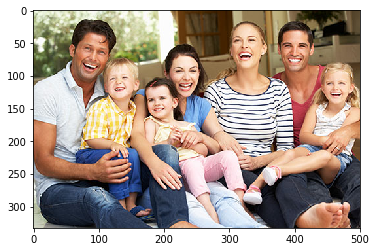

In [5]:
image =cv2.imread('Images/eye_face6.jpg')
fix_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)


### Detect Faces

In [4]:
faces =face_classifier.detectMultiScale(image ,1.3,5)

#detectMultiscale(input image Scale Factor ,Min Neighbors)

### No Faces Detected

In [5]:
if faces is():
    print('No Faces found')

### It's a kind of Magic

In [6]:
def detect_faces(fix_img):
    face_rects=face_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(fix_img,
                     (x,y),
                     (x+w,y+h),
                     (0,255,0),
                     (3))
        
    return fix_img    

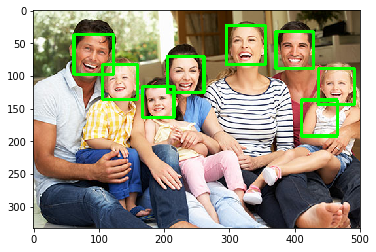

In [7]:
result =detect_faces(fix_img)
plt.imshow(result)

EYE DETECTION
--

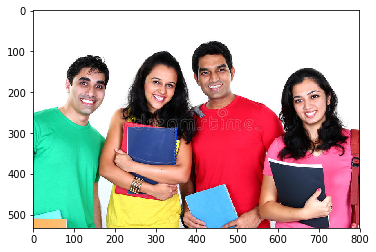

In [8]:
image =cv2.imread('Images/eye.jpg')
fix_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

In [9]:
eye_classifier=cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

In [10]:
def detect_eye(fix_img):
    eye_rects=eye_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(fix_img,
                     (x,y),
                     (x+w,y+h),
                     (255,255,255),
                     (3))
        
    return fix_img    

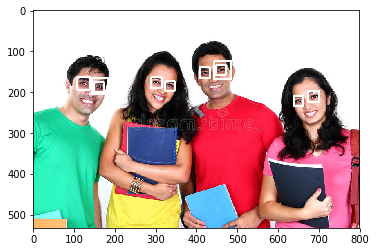

In [11]:
result =detect_eye(fix_img)
plt.imshow(result)

EYE AND FACE DETECTION
---

In [12]:
def detect_faces_eyes(fix_img):
    face_rects=face_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(fix_img,
                     (x,y),
                     (x+w,y+h),
                     (0,255,0),
                     7)
    eye_rects=eye_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(fix_img,
                     (x,y),
                     (x+w,y+h),
                     (255,255,255),
                     5)
        
    return fix_img    

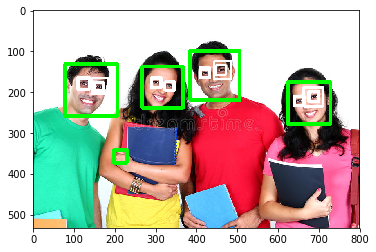

In [13]:
result =detect_faces_eyes(fix_img)
plt.imshow(result)

PEDESTRIAN DETECTION
---

In [13]:
body_classifier =cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

In [14]:
cap =cv2.VideoCapture('Video/People_Walking.mp4')

In [19]:
#While Loop
count=0
while cap.isOpened():
    
    #Read the Capture
    ret ,frame =cap.read()
    
    #Pass the Frame to the Classifier
    bodies =body_classifier.detectMultiScale(frame,1.2,3)
    
    #if Statement
    if ret==True:
        
          #Bound Boxes to Identified Bodies 
        for(x,y,w,h) in bodies:
            cv2.rectangle(frame,(x,y),(x+w ,y+h),(25,125,255),5)
            cv2.imshow('Pedestrians',frame)
            count=count+1
        
          #Exit with Esc button
        if cv2.waitKey(1)==27:
            break
            
     #else 
    else:
        break
#Release the capture & destroy all windows    

cap.release()
cv2.destroyAllWindows()
print("Number of pedestrians crossed is")
print(count)

Number of pedestrians crossed is
0


CAR DETECTION:
------

In [22]:
car_classifier =cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

In [23]:
cap =cv2.VideoCapture('Video/Vehicles2.mp4')

In [24]:
count=0
#While Loop
while cap.isOpened():
    
    #Read the Capture
    ret ,frame =cap.read()
    
    #Pass the Frame to the Classifier
    cars =car_classifier.detectMultiScale(frame,1.4,2)
    
    
    #if Statement
    if ret==True:
        
          #Bound Boxes to Identified car
        count=count+1   
        for(x,y,w,h) in cars:
            cv2.rectangle(frame,(x,y),(x+w ,y+h),(0,125,255),2)
            cv2.imshow('Cars',frame)
            
        
          #Exit with Esc button
        if cv2.waitKey(1)==27 :
            break
            
      
    else:
        break
    
    
cap.release()
cv2.destroyAllWindows()
print("Number of cars passed ")
print(count)

Number of cars passed 
1173


CAR PLATE DETECTION
-------

In [20]:
img =cv2.imread('Images/car_plate.jpg')

In [21]:
def display(img):
    fig =plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    new_img =cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

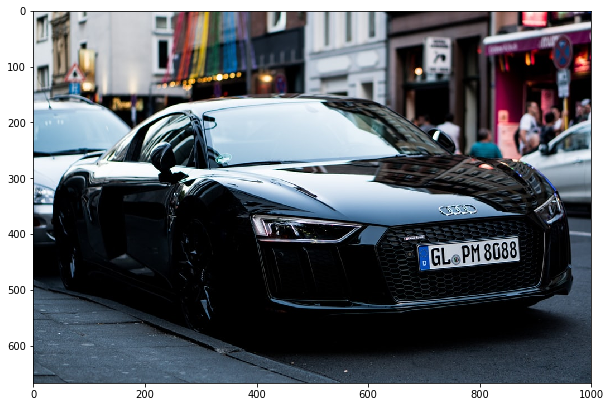

In [22]:
display(img)

In [23]:
plate_classifier =cv2.CascadeClassifier('Haarcascades/haarcascade_plate_number.xml')

In [24]:
def detectplate(img):
    
    plate_img=img.copy()
    
    plate=plate_classifier.detectMultiScale(plate_img,1.1,1)
    
    for (x,y,w,h) in plate:
        cv2.rectangle(plate_img,
                     (x,y),
                     (x+w,y+h),
                     (0,255,0),
                     (3))
        
    return plate_img    

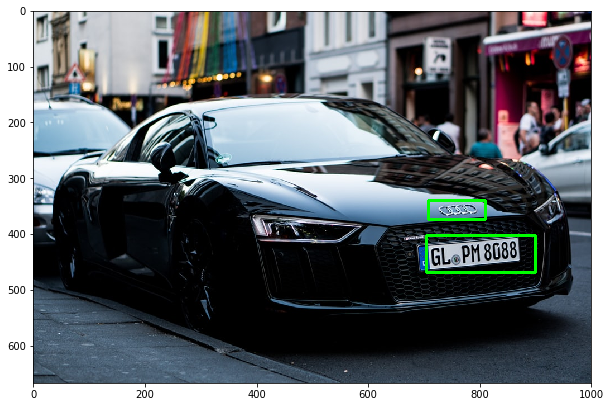

In [25]:
result=detectplate(img)
display(result)